# Milestone 3 - Independent Project

## Author - Matthew Denko

## Instructions

    Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course. In this milestone, you need to prepare the data for modeling as well as build an initial model that you will need to refine for Milestone 4..

    For Milestone 3 you should:

    1. prepare the data via cleaning, normalization, encoding, et cetera; and
    2. generate and evaluate a working model (linear, or time series).

## Abstract

This dataset contains demographic data from the 1994 Census database which was gathered to see if it could predict if an Adult makes >50k annually.

## Model

I want to examine a multiple linear regression model to see if the features (age, hours-per-week, and education-num) are a good predictor of capital-gain amount. I will first look at a multiple linear regression model, then I will explore a PCR model.

In [1]:
# Source Citation

source_citation = "Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science."
print("source citation = ",source_citation)
url = 'https://archive.ics.uci.edu/ml/datasets/Adult'
print("url =",url)

source citation =  Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
url = https://archive.ics.uci.edu/ml/datasets/Adult


In [2]:
# Load necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sms
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm

In [3]:
# Defining Functions

# Scale function

def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [4]:
# Reading url

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Adult= pd.read_csv(url, header=None)

# Assigning reasonable column names

Adult.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
                 "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country",">50K, <=50k"]
print(Adult.columns)
Adult.describe()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K, <=50k'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleanup

## Missing Data

In [5]:
#Removing cases with missing data

Adult = Adult.replace(to_replace= "?", value=float("NaN"))
Adult_null = Adult.isnull().sum()
print(Adult_null)
print("There are 0 columns with missing data")

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
>50K, <=50k       0
dtype: int64
There are 0 columns with missing data


## Checking the Distribution of Numeric Variables

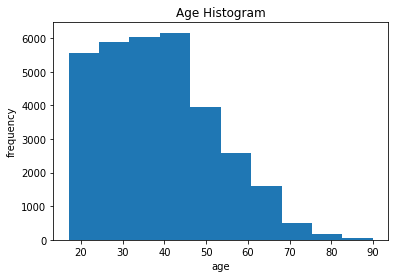

Age is strongly skewed right and does not represent a 
normal distribution, there is a higher concentrate of younger participants to 
older.


In [6]:
#age

age_hist = plt.hist(Adult.loc[:,'age'])
plt.title("Age Histogram")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show(age_hist)
age_comment = """Age is strongly skewed right and does not represent a 
normal distribution, there is a higher concentrate of younger participants to 
older."""
print(age_comment)

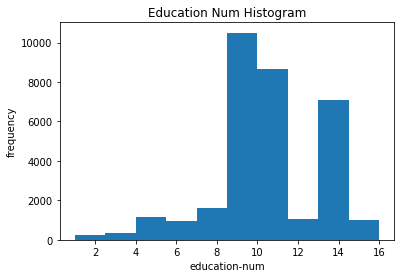

education num has a somewhat bi-modal distribution
with one center around 8-12 and another at 14


In [7]:
#education-num

education_num_hist = plt.hist(Adult.loc[:,'education-num'])
plt.title("Education Num Histogram")
plt.xlabel('education-num')
plt.ylabel('frequency')
plt.show(education_num_hist)
education_num_comment = """education num has a somewhat bi-modal distribution
with one center around 8-12 and another at 14"""
print(education_num_comment)

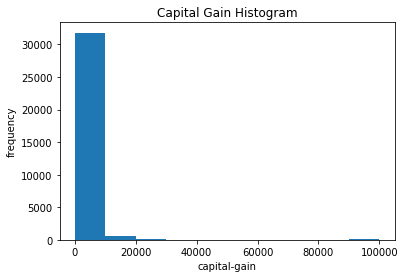

capital gain is a single modal distribution that
appears slightly right skewed


In [8]:
#capital-gain

capital_gain_hist = plt.hist(Adult.loc[:,'capital-gain'])
plt.title("Capital Gain Histogram")
plt.xlabel('capital-gain')
plt.ylabel('frequency')
plt.show(capital_gain_hist)
capital_gain_comment = """capital gain is a single modal distribution that
appears slightly right skewed"""
print(capital_gain_comment)

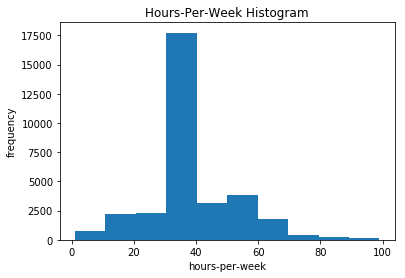

In [9]:
#hours-per-week

hours_per_week_hist = plt.hist(Adult.loc[:,'hours-per-week'])
plt.title("Hours-Per-Week Histogram")
plt.xlabel('hours-per-week')
plt.ylabel('frequency')
plt.show(hours_per_week_hist)
hours_per_week_comment = """hours per week appears to be close to a normal
distribution, with some slight right skewness"""

# Visualtion: Checking for Multicollinearity

I will now use plots to examine the relationship between the feature variables: age, education-num, hours-per-week

[Text(0,0.5,'hours-per-week'), Text(0.5,0,'education-num')]

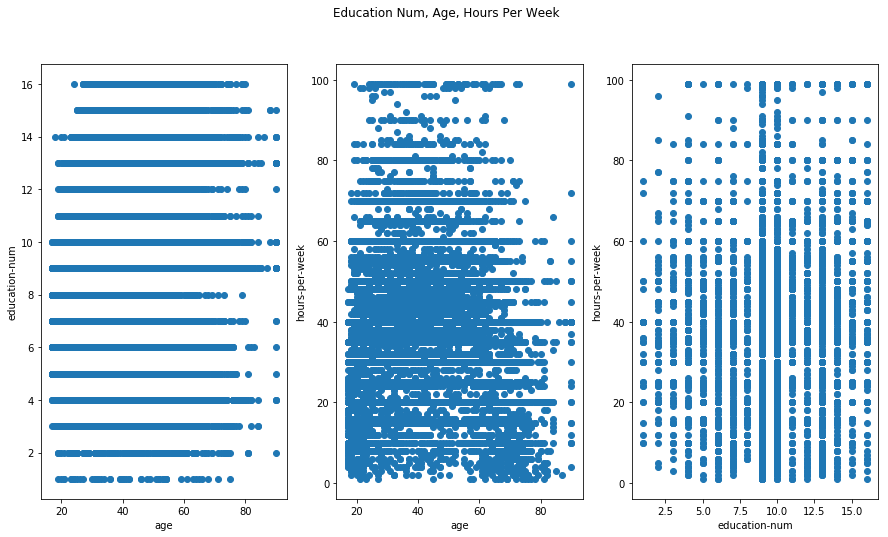

In [10]:
# Multicollinearity

plt.rcParams['figure.figsize'] = 15, 8
f, axarr = plt.subplots(1, 3)
f.suptitle('Education Num, Age, Hours Per Week')
axarr[0].scatter(Adult['age'], Adult['education-num'])
axarr[0].set(xlabel='age', ylabel='education-num')
axarr[1].scatter(Adult['age'], Adult['hours-per-week'])
axarr[1].set(xlabel='age', ylabel='hours-per-week')
axarr[2].scatter(Adult['education-num'], Adult['hours-per-week'])
axarr[2].set(xlabel='education-num', ylabel='hours-per-week')

### Comments

    There is significant overplotting so it is difficult to make any insights about multicolinearity. I will graph a few hexbin plots to examine the relationships more closely.

Text(0.5,0,'Education Num')

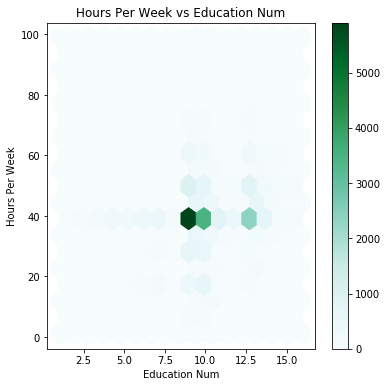

In [11]:
#Hexbin Plot 1 - Hours Per Week vs Education Num

ax = plt.figure(figsize=(6, 6)).gca() # define axis
Adult.plot.hexbin(x = 'education-num', y = 'hours-per-week', gridsize = 16, ax = ax)
ax.set_title('Hours Per Week vs Education Num') # Give the plot a main title
ax.set_ylabel('Hours Per Week')# Set text for y axis
ax.set_xlabel('Education Num')

### Comments:

    There appears to be no relationship between Hours Per Week and Education Num as the value of Hours Per Week is uniformly dense around 40 hours per week.

Text(0.5,0,'Age')

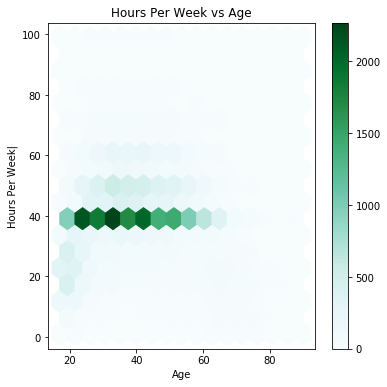

In [12]:
#Hexbin Plot 2 - Hours Per Week vs Age

ax = plt.figure(figsize=(6, 6)).gca() # define axis
Adult.plot.hexbin(x = 'age', y = 'hours-per-week', gridsize = 16, ax = ax)
ax.set_title('Hours Per Week vs Age') # Give the plot a main title
ax.set_ylabel('Hours Per Week|')# Set text for y axis
ax.set_xlabel('Age')

### Comments:

    There appears to be no relationship between Hours Per Week and Age as the value of Hours Per Week is uniformly dense around 40 hours per week.

Text(0.5,0,'Education Num')

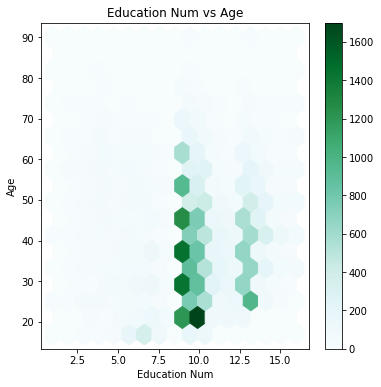

In [13]:
#Hexbin Plot 3 - Age vs Education Num

ax = plt.figure(figsize=(6, 6)).gca() # define axis
Adult.plot.hexbin(x = 'education-num', y = 'age', gridsize = 16, ax = ax)
ax.set_title('Education Num vs Age') # Give the plot a main title
ax.set_ylabel('Age')# Set text for y axis
ax.set_xlabel('Education Num')

### Comments:
    
    Education Num and Age also do not appear to have a relationship, there are two dense pockets of education across ages. There does not appear to be an issue with multicolinearity so I will proceed with a Mulitple Linear Regression Model.

# Modeling

## Multiple Linear Regression

In [14]:
# Define x and y

x = Adult[["age", "education-num", "hours-per-week"]] # note that this expects a pandas dataframe as shape, so subset with [[]]
y = Adult[["capital-gain"]]

In [15]:
# Model initialization

regression_model = LinearRegression()

# Fit the data(train the model)

regression_model.fit(x, y)

# Predict

y_predicted = regression_model.predict(x)

# model evaluation

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[ 37.72236043 320.44641964  34.14290841]]
Intercept: [-4988.71189481]
Root mean squared error:  53254967.38771101
R2 score:  0.023576757064181164


In [16]:
#Summary Statistics

X = sms.add_constant(x)

# Note the difference in argument order

model = sms.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capital-gain   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     262.0
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          4.67e-168
Time:                        20:58:39   Log-Likelihood:            -3.3584e+05
No. Observations:               32561   AIC:                         6.717e+05
Df Residuals:                   32557   BIC:                         6.717e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4988.7119    221.952    -22.477      0.000   -5423.746   -4553.678
age               37.7224      2.973     12.688      0.000      31.895      43.550
education-num    320.4464     15.902     20.152      0.000     289.278     351.614
hours-per-week    34.1429      3.319     10.287      0.000      27.638      40.648
==============================================================================
Omnibus:                    54726.346   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32339177.937
Skew:                          11.789   Prob(JB):                         0.00
Kurtosis:                     155.580   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comments:
    
    The model is not very accurate. It has an extremely low R squared value and adjusted R squared value. I want to see if I have too many features by running some backwards feature selection.

In [17]:
# Backwards Selection

model = LinearRegression() # use linear regression model for all features
rfe = RFE(model, 2) # use rfe to select top 3
fit = rfe.fit(x, y) # fit our model
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 2
Selected Features: [ True  True False]
Feature Ranking: [1 1 2]


/Users/matt.denko/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Comments:

    The backwards selection removes hours-per-week, which makes sense as its distribution was relatively uniform. I will now retest the model using only the first two features.

In [18]:
# Define x and y

x = Adult[["age", "education-num"]] # note that this expects a pandas dataframe as shape, so subset with [[]]
y = Adult[["capital-gain"]]

# Model initialization

regression_model = LinearRegression()

# Fit the data(train the model)

regression_model.fit(x, y)

# Predict

y_predicted = regression_model.predict(x)

# model evaluation

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[ 39.6827503  344.33879439]]
Intercept: [-3924.54598114]
Root mean squared error:  53428075.84347859
R2 score:  0.02040283492975148


In [19]:
# Summary Statistics

X = sms.add_constant(x)

# Note the difference in argument order

model = sms.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capital-gain   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     339.1
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          1.83e-146
Time:                        20:58:42   Log-Likelihood:            -3.3589e+05
No. Observations:               32561   AIC:                         6.718e+05
Df Residuals:                   32558   BIC:                         6.718e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3924.5460    196.688    -19.953      0.000   -4310.061   -3539.031
age              39.6828      2.972     13.353      0.000      33.858      45.508
education-num   344.3388     15.757     21.854      0.000     313.455     375.222
==============================================================================
Omnibus:                    54797.193   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32542182.664
Skew:                          11.820   Prob(JB):                         0.00
Kurtosis:                     156.060   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comments:
    
    Removing a feature did not help in improving the low R squared and adjusted R squared values. It actually decreased the adjusted R squared suggesting that there is not an issue of having too many features. I want to next run a PCR model to see if that improves the R squared and adjusted R squared.

## PCR

In [20]:
#rename columns

Adult.loc[:,"capitalgain"] = Adult.loc[:,"capital-gain"]
Adult.loc[:,"educationnum"] = Adult.loc[:,"education-num"]
Adult = Adult.drop("capital-gain",axis = 1)
Adult = Adult.drop("education-num", axis = 1)

# Define the target and features:

target_label = 'capitalgain'
non_features = ["workclass","fnlwgt","education","marital-status","occupation",
                 "relationship","race","sex","capital-loss","native-country",">50K, <=50k"]
feature_labels = [x for x in Adult.columns if x not in [target_label] + non_features]

# Filter out non-features and non-targets

Adult = Adult.drop(non_features, axis=1)

# One-hot encode inputs

Adult_expanded = pd.get_dummies(Adult, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(Adult_expanded.shape))

# Get target and original x-matrix

y = Adult[target_label]
x = Adult.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (32561, 4)


/Users/matt.denko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [21]:
# Scale all columns

# Create x-scaled

x_scaled = np.apply_along_axis(scale, 0, x)
print(x_scaled)

# Create a scaled y-target.

y_scaled = np.apply_along_axis(scale, 0, y)
print(y_scaled)

[[ 0.03067056 -0.03542945  1.13473876]
 [ 0.83710898 -2.22215312  1.13473876]
 [-0.04264203 -0.03542945 -0.42005962]
 ...
 [ 1.42360965 -0.03542945 -0.42005962]
 [-1.21564337 -1.65522476 -0.42005962]
 [ 0.98373415 -0.03542945 -0.42005962]]
[ 0.1484529  -0.14592048 -0.14592048 ... -0.14592048 -0.14592048
  1.88842434]


In [22]:
# PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(x_scaled)
column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

Text(0,0.5,'Explained Variance')

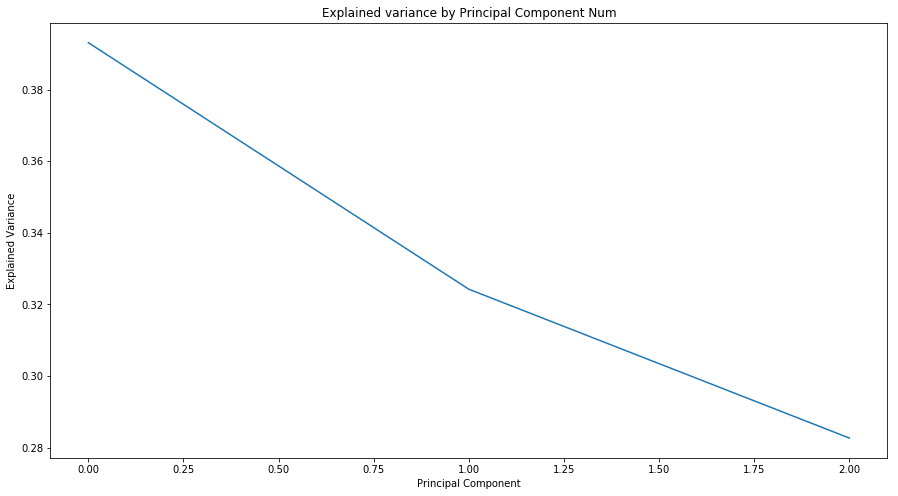

In [23]:
# Plot the explained variance for all principal components.

plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

### Comments:

    All three components have similar explained variance ratios. 

                            OLS Regression Results                            
Dep. Variable:            capitalgain   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     262.0
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          4.67e-168
Time:                        20:58:47   Log-Likelihood:                -45814.
No. Observations:               32561   AIC:                         9.164e+04
Df Residuals:                   32557   BIC:                         9.167e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.344e-16      0.005   2.45e-14      1.0

/Users/matt.denko/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/matt.denko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residual Histogram')

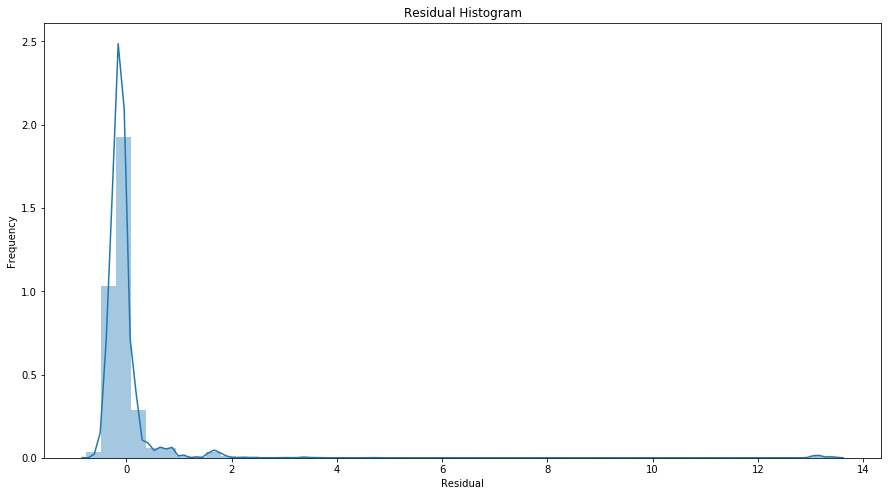

In [24]:
# 3 components

# Perform linear regression with the first N columns.

n = 3
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:

print(results.summary())

# Plot a histogram of the residuals

sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Comments:

    The adjusted R-squared for the PCR model with 3 components is at .023 which is the same as the original multiple linear regression model. This indicates that the PCR did not improve the models accuarcy from regular multiple linear regression. I will now test out the PCR model with only 2 components.

                            OLS Regression Results                            
Dep. Variable:            capitalgain   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 10 Mar 2019   Prob (F-statistic):          3.88e-157
Time:                        20:58:48   Log-Likelihood:                -45842.
No. Observations:               32561   AIC:                         9.169e+04
Df Residuals:                   32558   BIC:                         9.171e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.091e-16      0.005  -3.82e-14      1.0

/Users/matt.denko/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/matt.denko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residual Histogram')

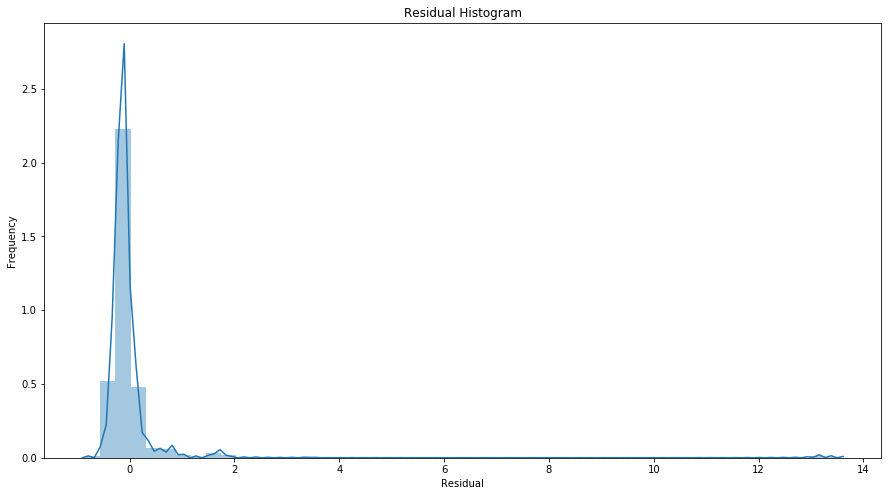

In [25]:
# 2 components

# Perform linear regression with the first N columns.

n = 2
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:

print(results.summary())

# Plot a histogram of the residuals

sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Comments:
    
    With only 2 components the adjusted r squared decreases to 0.022 from .023 which suggest that having 3 components is a better model than 2 components. However, none of these models had high accuary or prediction potential which indicatres that age, education-num, and hours-per-week worked together are not good indicators of capital gains.